In [3]:
import config_readwrite as crw
import matplotlib.pyplot as plt
import numpy as np
import os, sys
import pandas as pd

from scipy import stats
from sklearn.preprocessing import StandardScaler
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import plot_params as pp
pp.fonts()

('sans-serif', 'Arial', 18)

# params

In [23]:
CL = "hepg2"
PREFIX = "reg.all.2tasks"
DATA_PATH = f"/wynton/home/ahituv/fongsl/EMF/US/ml_emf/data/deepstarr/deseq2/{CL}/{PREFIX}"
DATA_PATH_SCALED = f"/wynton/home/ahituv/fongsl/EMF/US/ml_emf/data/deepstarr/deseq2/{CL}/reg.all_scaled.10epochs"

In [ ]:
os.chdir(DATA_PATH)

# load predictions
PRED = f'DeepSTARR_ATAC.{PREFIX}.test.predictions.tsv'
TEST = f"{PREFIX}.Sequences_activity_Test.txt"
DIFF_ACC = f"/wynton/group/ahituv/data/US-MPRA/ATAC-seq/Diffbind_results/{CL}_deseq2-nondiff.in.diffAcc.bed"
TEST_CHR = "chr8"

SCALED = True

# load data

## predictions

In [24]:
pred = pd.read_csv(PRED, sep='\t', skiprows =1, names =["pred0", "pred1"])
print(pred.shape)
pred.head()

(4755, 2)


,pred0,pred1
0,1.058509,1.095995
1,0.042933,0.085685
2,-0.428877,-0.478162
3,-0.091142,-0.018019
4,-0.403016,-0.409626


## test data

In [25]:
test = pd.read_csv(TEST, sep='\t')
test["type"] = test["coor.type"].apply(lambda x: x.split("|")[0])

print(test.shape)
test.head()

(4755, 5)


,coor.type,US,ctrl,US_DIF,type
0,hepg2.36796|chr8:143936519-143936790,4.637732,4.238654,-0.399078,hepg2.36796
1,hepg2.41093|chr8:120346935-120347206,2.188827,1.466279,-0.722547,hepg2.41093
2,hepg2.23852|chr8:110329958-110330229,1.005733,2.109584,1.103851,hepg2.23852
3,hepg2.5274|chr8:116161865-116162136,2.188827,0.552668,-1.636158,hepg2.5274
4,hepg2.108503|chr8:90203478-90203749,0.744025,0.515214,-0.228811,hepg2.108503


In [26]:
if SCALED is True:
    sc = StandardScaler()
    test_scaled = pd.DataFrame(sc.fit_transform(test[["US", "ctrl"]].copy()), 
                              columns = ['US_scaled', "ctrl_scaled"])
    
    test_scaled = pd.merge(test, test_scaled, left_index=True, right_index=True)

test_scaled

,coor.type,US,ctrl,US_DIF,type,US_scaled,ctrl_scaled
0,hepg2.36796|chr8:143936519-143936790,4.637732,4.238654,-0.399078,hepg2.36796,1.364083,1.079550
1,hepg2.41093|chr8:120346935-120347206,2.188827,1.466279,-0.722547,hepg2.41093,-0.184385,-0.631286
2,hepg2.23852|chr8:110329958-110330229,1.005733,2.109584,1.103851,hepg2.23852,-0.932467,-0.234302
3,hepg2.5274|chr8:116161865-116162136,2.188827,0.552668,-1.636158,hepg2.5274,-0.184385,-1.195077
4,hepg2.108503|chr8:90203478-90203749,0.744025,0.515214,-0.228811,hepg2.108503,-1.097948,-1.218190
...,...,...,...,...,...,...,...
4750,hepg2.72917|chr8:17001745-17002016,2.098935,2.387735,0.288800,hepg2.72917,-0.241224,-0.062655
4751,hepg2.50487|chr8:31236687-31236958,1.633296,0.873975,-0.759321,hepg2.50487,-0.535652,-0.996798
4752,hepg2.98690|chr8:38527045-38527316,4.106586,4.198735,0.092149,hepg2.98690,1.028234,1.054916
4753,hepg2.5735|chr8:118090720-118090991,0.000000,1.861414,1.861414,hepg2.5735,-1.568402,-0.387448


## merge all data

In [27]:
pt = pd.merge(test_scaled, pred, left_index=True, right_index=True)
pt["diff_acc"]=False

In [28]:
pt.corr()

,US,ctrl,US_DIF,US_scaled,ctrl_scaled,pred0,pred1,diff_acc
US,1.000000,0.918129,-0.144374,1.000000,0.918129,0.598690,0.590153,NaN
ctrl,0.918129,1.000000,0.259577,0.918129,1.000000,0.607836,0.607288,NaN
US_DIF,-0.144374,0.259577,1.000000,-0.144374,0.259577,0.058796,0.078231,NaN
US_scaled,1.000000,0.918129,-0.144374,1.000000,0.918129,0.598690,0.590153,NaN
ctrl_scaled,0.918129,1.000000,0.259577,0.918129,1.000000,0.607836,0.607288,NaN
pred0,0.598690,0.607836,0.058796,0.598690,0.607836,1.000000,0.992099,NaN
pred1,0.590153,0.607288,0.078231,0.590153,0.607288,0.992099,1.000000,NaN
diff_acc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


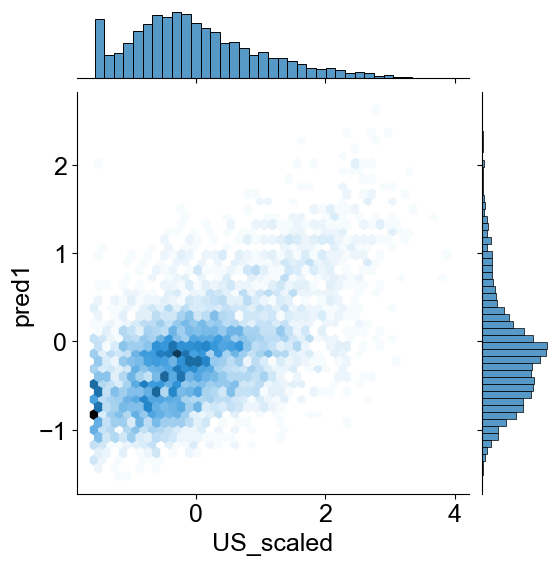

In [29]:
sns.jointplot(x="US_scaled", y="pred1", data=pt, kind="hex")

In [30]:
dif_acc = pd.read_csv(DIFF_ACC, sep='\t', header=None, 
                      names=["#chr_da", "start_da", "end_da", "id_da", 
                      "#chr_peak","start_peak", "end_peak", "type" ]
                     )
# get true differentially accessible peaks 
test_dif_acc = set(dif_acc.loc[dif_acc["#chr_peak"] == TEST_CHR, "type"])

# annotate ids that are differentially accessible according to DESEQ2
pt.loc[pt["type"].isin(test_dif_acc), "diff_acc"] = True

In [31]:
len(test_dif_acc)

57

## compute score differences

In [32]:
pt["ctrl-us"]= pt["ctrl_scaled"] - pt["US_scaled"]
pt["pred_ctrl-pred_us"]= pt["pred0"] - pt["pred1"]

## correlation between predictions

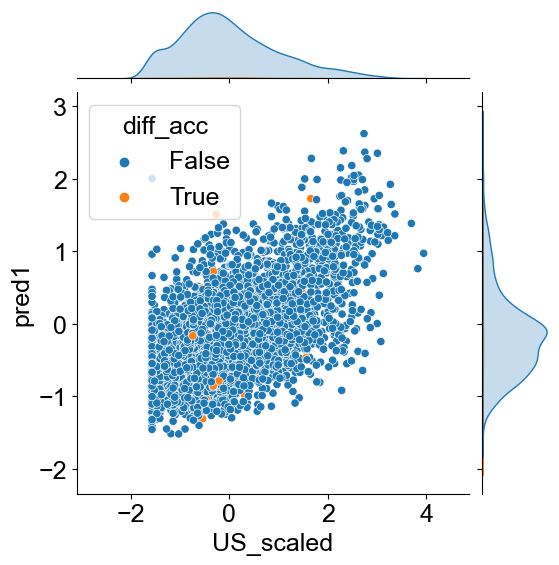

In [33]:
sns.jointplot(x="US_scaled", y="pred1", data=pt, hue = "diff_acc"
              #kind="hex"
             )

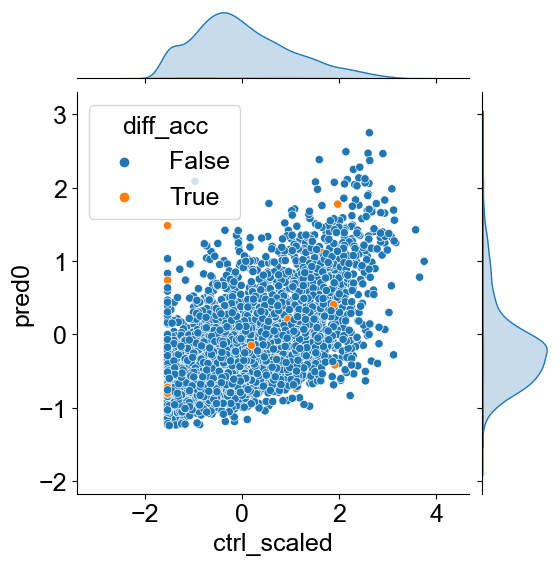

In [34]:
sns.jointplot(x="ctrl_scaled", y="pred0", data=pt,  hue = "diff_acc"
             # kind="hex"
             )

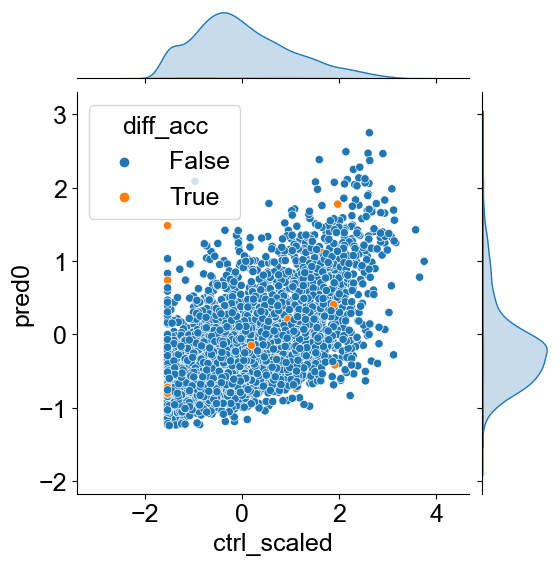

In [36]:
sns.jointplot(x="ctrl_scaled", y="pred0", data=pt, hue="diff_acc")

,ctrl-us,pred_ctrl-pred_us
ctrl-us,1.000000,-0.157999
pred_ctrl-pred_us,-0.157999,1.000000


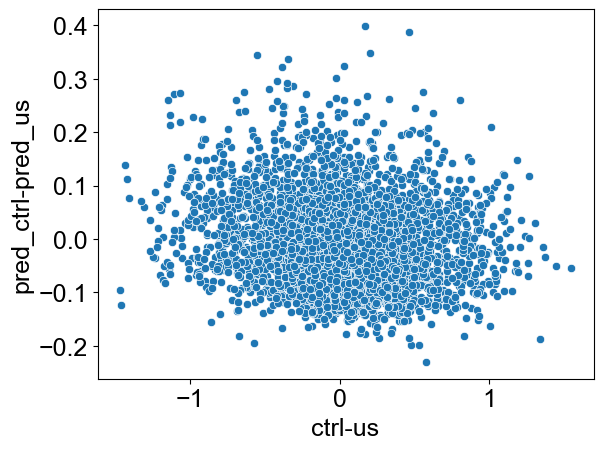

In [37]:
x = "ctrl-us"
y = "pred_ctrl-pred_us"
sns.scatterplot(x=x,y=y, data=pt)
pt[[x,y]].corr()

## evaluate diff accessible

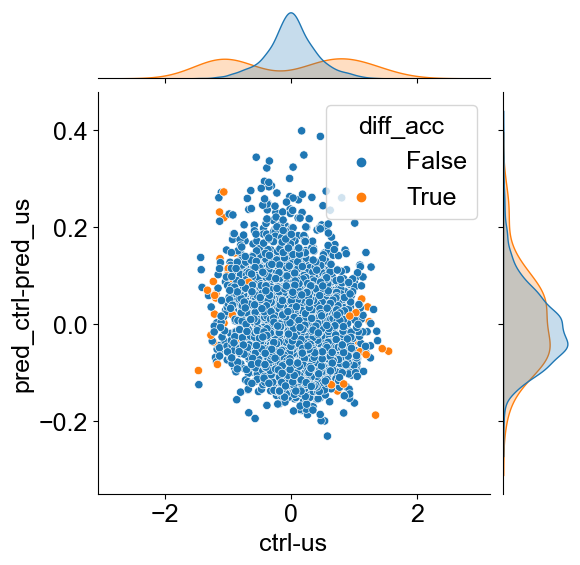

In [21]:
sns.jointplot(x=x,y=y, data=pt, hue="diff_acc", marginal_kws={"common_norm":False})

In [22]:
pt.loc[pt["diff_acc"]==True].corr()

,US,ctrl,US_DIF,US_scaled,ctrl_scaled,pred0,pred1,diff_acc,ctrl-us,pred_ctrl-pred_us
US,1.000000,0.537837,-0.251713,1.000000,0.537837,0.376361,0.341126,NaN,-0.271611,0.054948
ctrl,0.537837,1.000000,0.680524,0.537837,1.000000,0.441763,0.475645,NaN,0.665274,-0.409721
US_DIF,-0.251713,0.680524,1.000000,-0.251713,0.680524,0.180025,0.249545,NaN,0.999787,-0.518109
US_scaled,1.000000,0.537837,-0.251713,1.000000,0.537837,0.376361,0.341126,NaN,-0.271611,0.054948
ctrl_scaled,0.537837,1.000000,0.680524,0.537837,1.000000,0.441763,0.475645,NaN,0.665274,-0.409721
pred0,0.376361,0.441763,0.180025,0.376361,0.441763,1.000000,0.989129,NaN,0.171004,-0.375553
pred1,0.341126,0.475645,0.249545,0.341126,0.475645,0.989129,1.000000,NaN,0.240887,-0.507754
diff_acc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ctrl-us,-0.271611,0.665274,0.999787,-0.271611,0.665274,0.171004,0.240887,NaN,1.000000,-0.516391
pred_ctrl-pred_us,0.054948,-0.409721,-0.518109,0.054948,-0.409721,-0.375553,-0.507754,NaN,-0.516391,1.000000


In [26]:
pt.loc[pt["diff_acc"]==True].corr(method="spearman")

,US,ctrl,US_scaled,ctrl_scaled,pred_US,pred_ctrl,diff_acc,ctrl-us,pred_ctrl-pred_us
US,1.000000,0.476403,1.000000,0.476403,0.359745,0.346310,NaN,-0.377211,0.103786
ctrl,0.476403,1.000000,0.476403,1.000000,0.405516,0.403459,NaN,0.607467,0.240273
US_scaled,1.000000,0.476403,1.000000,0.476403,0.359745,0.346310,NaN,-0.377211,0.103786
ctrl_scaled,0.476403,1.000000,0.476403,1.000000,0.405516,0.403459,NaN,0.607467,0.240273
pred_US,0.359745,0.405516,0.359745,0.405516,1.000000,0.997537,NaN,0.067541,0.566697
pred_ctrl,0.346310,0.403459,0.346310,0.403459,0.997537,1.000000,NaN,0.070490,0.598068
diff_acc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ctrl-us,-0.377211,0.607467,-0.377211,0.607467,0.067541,0.070490,NaN,1.000000,0.128275
pred_ctrl-pred_us,0.103786,0.240273,0.103786,0.240273,0.566697,0.598068,NaN,0.128275,1.000000


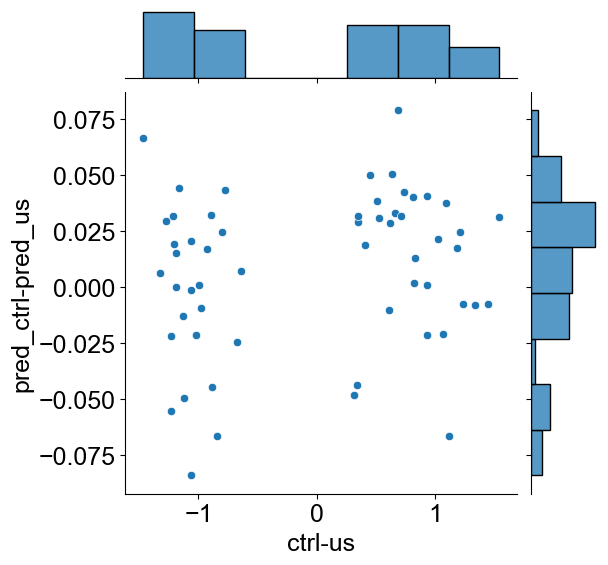

In [27]:
sns.jointplot(x=x,y=y, data=pt.loc[pt["diff_acc"]==True], marginal_kws={"common_norm":False})